## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from classifiers.random_classifier import RandomClassifier
from classifiers.majority_classifier import MajorityClassifier
from classifiers.naive_bayes_classifier import NaiveBayesClassifier
from classifiers.logistic_regression_classifier import LogisticRegressionClassifier
from classifiers.decision_tree_classifier import DecisionTreeClassifier
from classifiers.subspace_decision_tree_classifier import SubspaceDecisionTreeClassifier

In [2]:
train_df = pd.read_csv('./seminar_2/train.csv')

In [3]:
train_df.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
0,3,3.932,3.2512,0,0.0,0,0,0,26.7,2,...,0,0,1,3.076,2.417,0,7.601,0,0,2
1,5,4.236,3.3944,0,0.0,0,0,0,29.4,2,...,0,0,0,3.351,2.405,0,8.003,0,0,2
2,6,4.236,3.4286,0,0.0,0,0,0,28.6,2,...,0,0,0,3.351,2.556,0,7.904,0,0,2
3,7,5.000,5.0476,1,0.0,0,0,0,11.1,0,...,0,0,1,4.712,4.583,0,9.303,0,0,2
4,8,4.525,3.8301,0,0.0,0,0,0,31.6,3,...,0,0,0,3.379,2.143,0,7.950,0,0,2


In [4]:
test_df = pd.read_csv('./seminar_2/test.csv')

In [5]:
test_df.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
0,1,3.919,2.6909,0,0,0,0,0,31.4,2,...,0,0,0,2.949,1.591,0,7.253,0,0,2
1,2,4.170,2.1144,0,0,0,0,0,30.8,1,...,0,0,0,3.315,1.967,0,7.257,0,0,2
2,4,3.000,2.7098,0,0,0,0,0,20.0,0,...,0,0,1,3.046,5.000,0,6.690,0,0,2
3,13,4.214,2.6272,0,0,0,0,0,30.0,3,...,0,0,0,2.998,1.722,0,6.770,0,0,2
4,16,3.942,2.7719,1,0,0,0,0,31.6,2,...,0,0,0,3.542,1.739,0,8.127,0,1,2


## Exploration

In [6]:
class_counts = train_df["Class"].value_counts()

In [7]:
print("Class 1: ", class_counts[1], "percentage: ", class_counts[1]/len(train_df))
print("Class 2: ", class_counts[2], "percantage:", class_counts[2]/len(train_df))

Class 1:  564 percentage:  0.6666666666666666
Class 2:  282 percantage: 0.3333333333333333


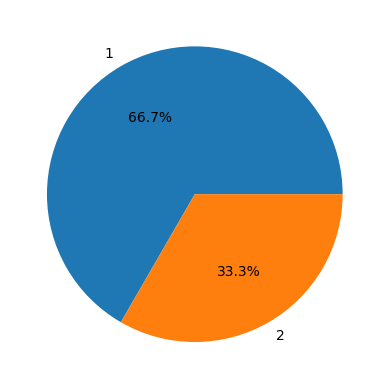

In [8]:
p = plt.pie(x=class_counts, labels=class_counts.index, autopct='%1.1f%%')

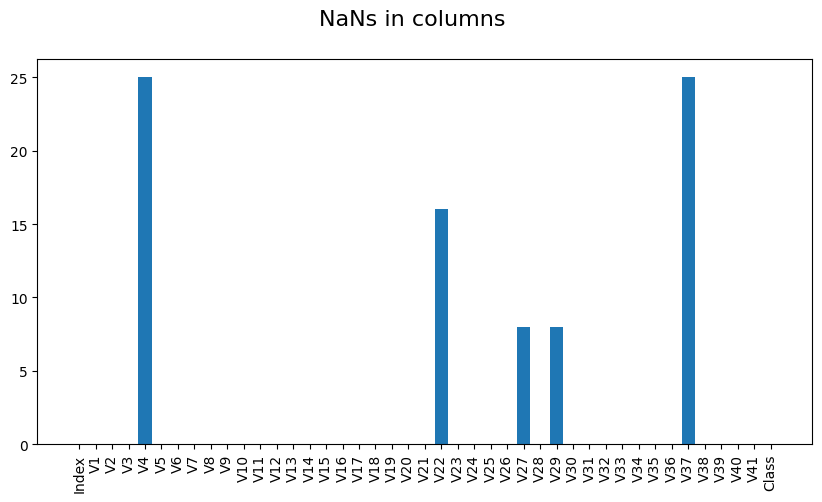

In [9]:
nans = train_df.isnull().sum(axis = 0)

fig = plt.figure(figsize=(10, 5))
fig.suptitle('NaNs in columns', fontsize=16)
plt.bar(nans.index, nans.values)
plt.xticks(rotation=90)
plt.show()

In [10]:
correlation_in_data = train_df.corr()

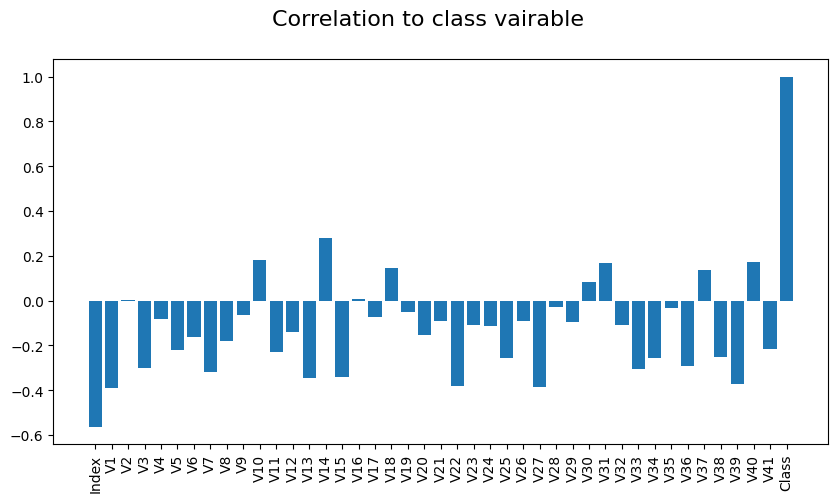

In [11]:
correlation_to_class = correlation_in_data["Class"]

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Correlation to class vairable', fontsize=16)
plt.bar(correlation_to_class.index, correlation_to_class.values)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: >

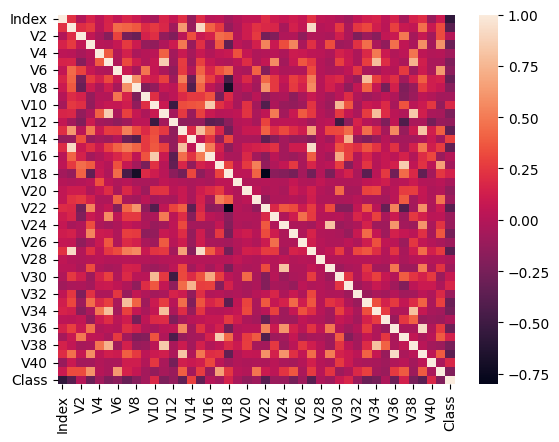

In [12]:
sns.heatmap(correlation_in_data, fmt=".2f")

In [13]:
correlated_columns = set()
threshold = 0.75

for i in range(len(correlation_in_data.columns)):
    for j in range(i):
        if abs(correlation_in_data.iloc[i, j]) > threshold:
            colname1 = correlation_in_data.columns[i]
            colname2 = correlation_in_data.columns[j]
            correlated_columns.add((colname1, colname2, correlation_in_data.iloc[i, j]))

print(correlated_columns)
print(len(correlated_columns), "highly correlated features")

{('V34', 'V5', 0.7827712292006271), ('V22', 'V18', -0.8008371258856498), ('V27', 'V15', 0.9230962155600061), ('V29', 'V24', 0.8046206066746212), ('V38', 'V11', 0.8368979414216005), ('V34', 'V11', 0.7852915815925773), ('V30', 'V10', 0.7577897873010442), ('V11', 'V5', 0.8590175645510726), ('V16', 'V10', 0.8439634438135399), ('V39', 'V13', 0.8135703600627614), ('V38', 'V34', 0.7988417285560266), ('V27', 'V1', 0.921560062534691), ('V15', 'V13', 0.791588421036705), ('V15', 'V1', 0.90971096205887), ('V39', 'V36', 0.9165966103510599), ('V33', 'V7', 0.7858011767376897), ('V37', 'V17', 0.8498222432021918)}
17 highly correlated features


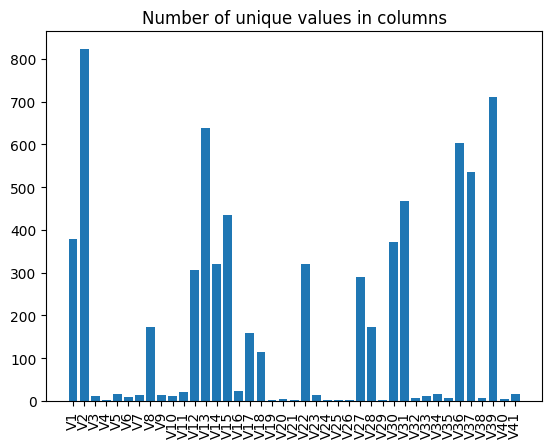

In [14]:
train_df_without_index_and_class = train_df.drop(["Index", "Class"], axis=1)
plt.bar(train_df_without_index_and_class.nunique().index, train_df_without_index_and_class.nunique().values)
plt.xticks(rotation=90)
plt.title("Number of unique values in columns")
plt.show()

Text(0.5, 1.0, 'Outliers of all columns')

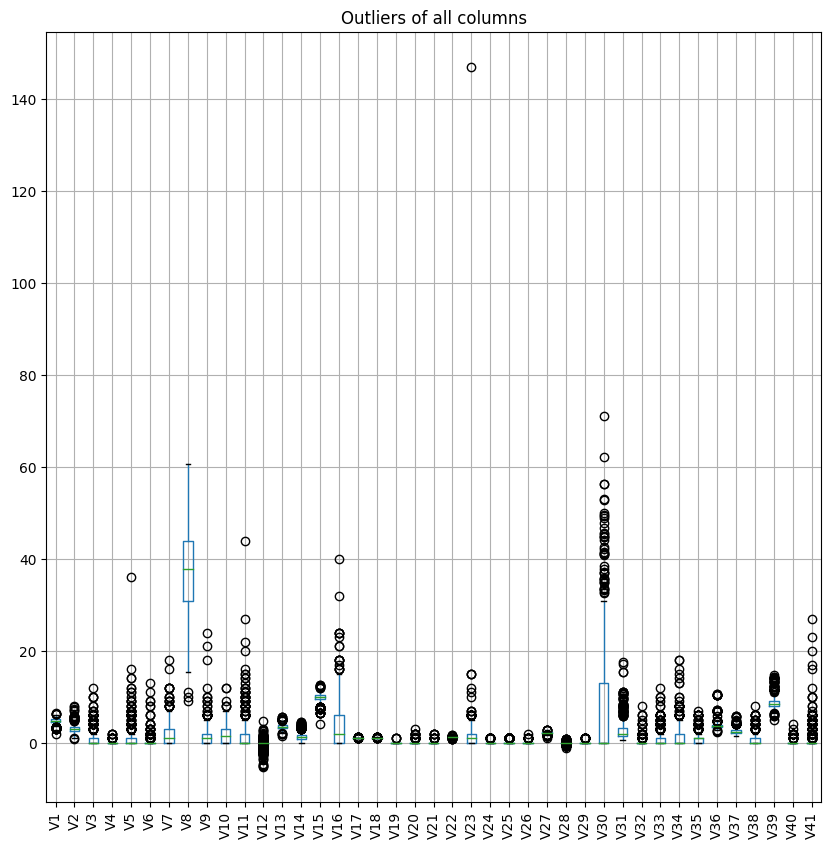

In [15]:
train_df_without_index_and_class.boxplot(figsize=(10, 10))
plt.xticks(rotation=90)
plt.title("Outliers of all columns")

In [16]:
continuous_columns =  [i for i in train_df_without_index_and_class.nunique().index.where(train_df_without_index_and_class.nunique().values >= 100) if i is not None]
" ".join(continuous_columns)

'V1 V2 V8 V12 V13 V14 V15 V17 V18 V22 V27 V28 V30 V31 V36 V37 V39'

## Modeling

In [17]:
train_features = train_df.drop(["Class", "Index"], axis=1)
train_target = train_df["Class"]

test_features = test_df.drop(["Class", "Index"], axis=1)
test_target = test_df["Class"]

In [18]:
discrete = False
N_bins = 10
N_unique = 100
fillna_method = pd.DataFrame.mean
dropna = False
outliers_method = None
polinomial = None

In [19]:
rnd_classifier = RandomClassifier(train_features, train_target)
majority_classifier = MajorityClassifier(train_df, train_target)
nb_classifier = NaiveBayesClassifier(train_features, train_target, discrete=discrete, N_bins=N_bins, N_unique_values=N_unique, fillna_method=fillna_method, dropna=dropna, outliers_method=outliers_method, polinomial=polinomial)
lr_classifier = LogisticRegressionClassifier(train_features, train_target, discrete=discrete, N_bins=N_bins, N_unique_values=N_unique, fillna_method=fillna_method, dropna=dropna, outliers_method=outliers_method, polinomial=polinomial, solver='lbfgs', max_iter=1000)
dt_classifier = DecisionTreeClassifier(train_features, train_target, discrete=discrete, N_bins=N_bins, N_unique_values=N_unique, fillna_method=fillna_method, dropna=dropna, outliers_method=outliers_method, polinomial=polinomial, random_state=42)
sdt_classifier = SubspaceDecisionTreeClassifier(train_features, train_target, discrete=discrete, N_bins=N_bins, N_unique_values=N_unique, fillna_method=fillna_method, dropna=dropna, outliers_method=outliers_method, polinomial=polinomial, random_state=42)

In [20]:
classifiers = [rnd_classifier, majority_classifier, nb_classifier, lr_classifier, dt_classifier, sdt_classifier]

In [21]:
display_df = pd.DataFrame(columns=["Feature_Importance", "Correlation", "Feature_Name"])
display_df["Feature_Importance"] = dt_classifier.classifier.feature_importances_
display_df["Correlation"] = abs(train_df.corr()["Class"].drop(["Class", "Index"]).values)
display_df["Feature_Name"] = train_features.columns

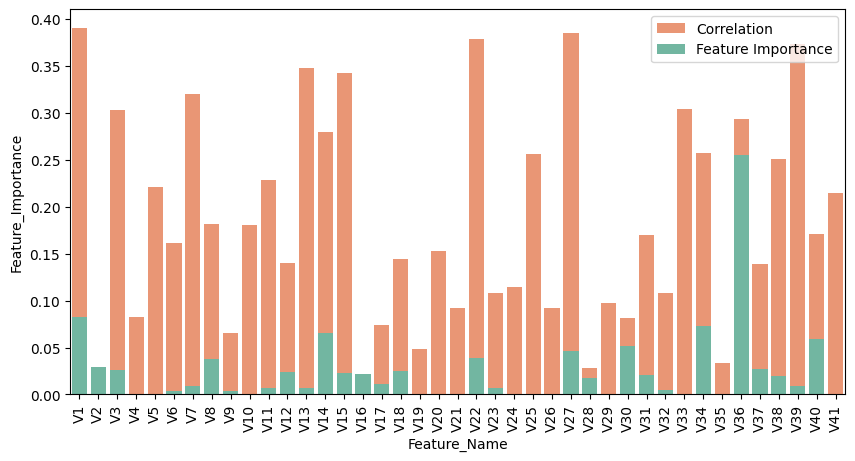

In [22]:
f, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x="Feature_Name", y="Correlation", data=display_df, color=sns.color_palette("Set2", 10)[1], label="Correlation")
sns.barplot(x="Feature_Name", y="Feature_Importance", data=display_df, color=sns.color_palette("Set2", 10)[0], label="Feature Importance")

plt.xticks(rotation=90)
plt.legend()

In [23]:
correlation_matrix = train_df.drop(["Index", "Class"], axis=1).corr()

In [24]:
N_best = 10

most_important = display_df.sort_values(by="Feature_Importance", ascending=False).head(N_best)
most_important

,Feature_Importance,Correlation,Feature_Name
35,0.254609,0.293024,V36
0,0.082177,0.390415,V1
33,0.073177,0.256621,V34
13,0.065132,0.279777,V14
39,0.058775,0.170994,V40
29,0.051583,0.081655,V30
26,0.045778,0.385326,V27
21,0.038365,0.379025,V22
7,0.037277,0.181887,V8
1,0.029652,0.001660,V2


In [25]:
def add_non_linearly_dependent_features(most_important, feature_name, threshold=1.05, correlation_th=0.85):
    feature_data = most_important[most_important["Feature_Name"] == feature_name].iloc[0]
    coeficient = feature_data["Correlation"] / feature_data["Feature_Importance"]
    if coeficient < threshold:
        strongest_correlation = correlation_matrix[feature_name].sort_values(ascending=False).head(2).iloc[1]
        correlated_features = correlation_matrix[feature_name][correlation_matrix[feature_name] > correlation_th * strongest_correlation].index

        for correlated_feature in correlated_features:
            if correlated_feature == feature_name:
                continue
            if correlated_feature not in most_important["Feature_Name"].values:
                most_important = pd.concat([most_important, display_df[display_df["Feature_Name"] == correlated_feature]], ignore_index=True)
                add_non_linearly_dependent_features(most_important, correlated_feature, threshold)
    return most_important

In [26]:
for feature in most_important["Feature_Name"].values:
   most_important = add_non_linearly_dependent_features(most_important, feature)

In [27]:
most_important

,Feature_Importance,Correlation,Feature_Name
0,0.254609,0.293024,V36
1,0.082177,0.390415,V1
2,0.073177,0.256621,V34
3,0.065132,0.279777,V14
4,0.058775,0.170994,V40
5,0.051583,0.081655,V30
6,0.045778,0.385326,V27
7,0.038365,0.379025,V22
8,0.037277,0.181887,V8
9,0.029652,0.001660,V2


In [28]:
most_important["Feature_Name"].values

array(['V36', 'V1', 'V34', 'V14', 'V40', 'V30', 'V27', 'V22', 'V8', 'V2',
       'V17', 'V37'], dtype=object)

## Evaluation

In [35]:
all_data = pd.concat([train_df, test_df], axis=0)
N_folds = 5
N_metrics = 5
repetitions = 10

In [36]:
def fold(data, k=5):
    data = data.sample(frac=1).reset_index(drop=True)
    folds = []
    for i in range(k):
        folds.append(data.iloc[i*len(data)//k:(i+1)*len(data)//k])
    return folds

In [37]:
def train(folds):
    classifier_accuracies = np.zeros(shape=(len(classifiers), N_metrics))
    for i in range(len(folds)):
        train_data = pd.concat([folds[j] for j in range(len(folds)) if j != i], axis=0)
        train_features = train_data.drop(["Class", "Index"], axis=1)
        train_target = train_data["Class"]

        test_data = folds[i]
        test_features = test_data.drop(["Class", "Index"], axis=1)
        test_target = test_data["Class"]

        for j, c in enumerate(classifiers):
            c.fit(train_features, train_target)
            classifier_accuracies[j] += np.array(c.evaluate(test_features, test_target))
    classifier_accuracies = classifier_accuracies / len(folds)
    return classifier_accuracies

In [38]:
scores = np.empty(shape=(repetitions, len(classifiers), N_metrics))

In [39]:
for i in range(repetitions):
    folds = fold(all_data, k=N_folds)
    scores[i] = train(folds)

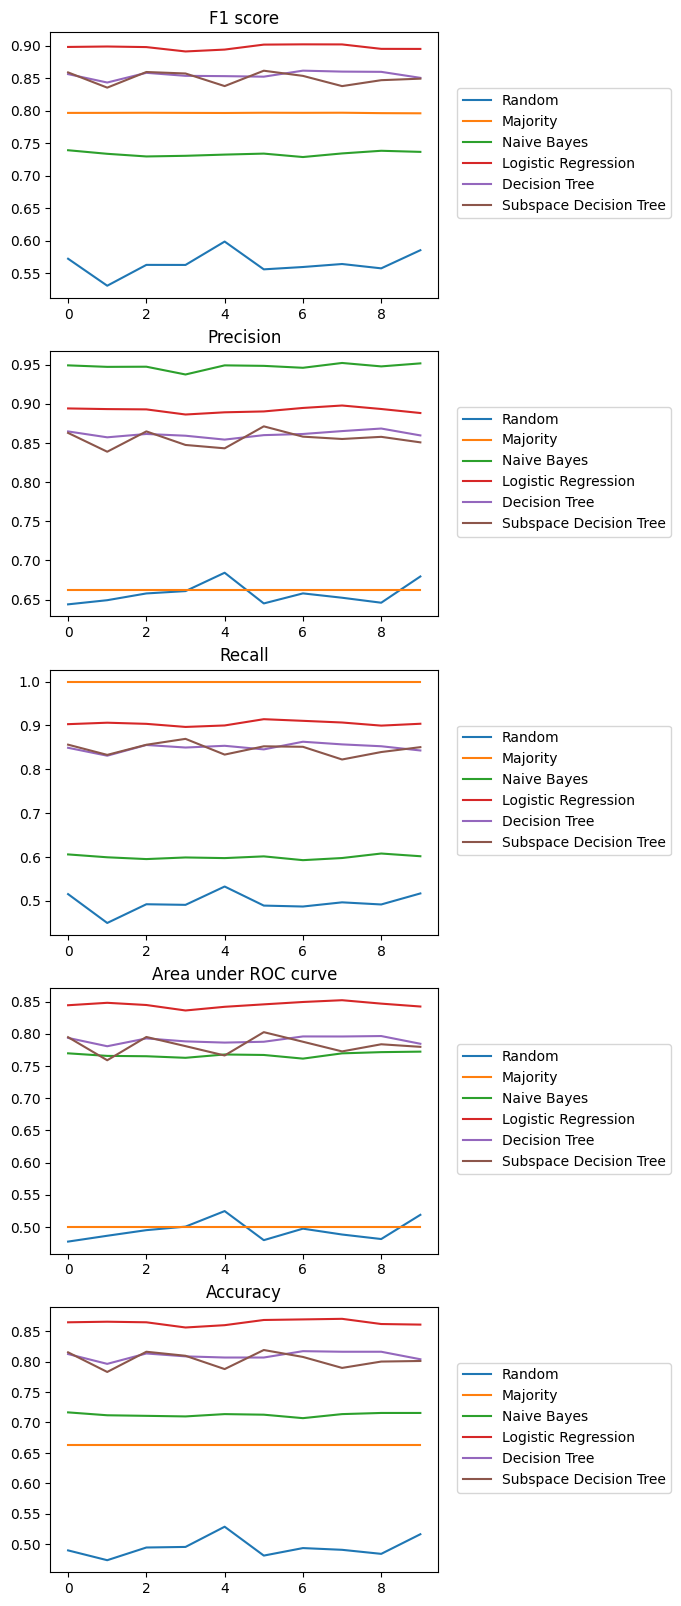

In [41]:
score_names = ["F1 score", "Precision", "Recall", "Area under ROC curve", "Accuracy"]
fig, ax = plt.subplots(len(score_names), 1, figsize=(5, len(score_names) * 4))
for i in range(len(score_names)):
    ax[i].set_title(score_names[i])
    ax[i].plot(scores[:, 0, i], label="Random")
    ax[i].plot(scores[:, 1, i], label="Majority")
    ax[i].plot(scores[:, 2, i], label="Naive Bayes")
    ax[i].plot(scores[:, 3, i], label="Logistic Regression")
    ax[i].plot(scores[:, 4, i], label="Decision Tree")
    ax[i].plot(scores[:, 5, i], label="Subspace Decision Tree")
    ax[i].legend(loc=(1.05, 0.3))

## Report

#### To Do

- feature selection
- transformation (multiply high corr and low corr)